In [6]:
from collections import Counter
from collections import defaultdict
import functools

from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import skimage
from skimage import io

%matplotlib inline
set_matplotlib_formats('svg')
plt.rcParams["patch.force_edgecolor"] = True

In [7]:
df = pd.read_csv("../data/interim/texts.csv")
df.head()

,filename,text
0,455_2_6.txt,кили сатоуты
1,275_23_8.txt,тованi датском чрез голштенского
2,103_96_13.txt,щию божиею офензиве сию компанию
3,448_10_15.txt,весть до по i тотчас пороги iзмѣрет i бу
4,347_51_1.txt,вах доволно о всем iзяснено аднако ж нынѣ еше


In [8]:
print("Median amount of symbols in text: %.0f" % df.text.str.len().median())
print("Mean amount of symbols in text: %.2f" % df.text.str.len().mean())
print("Min amount of symbols in text: %.0f" % df.text.str.len().min())
print("Max amount of symbols in text: %.0f" % df.text.str.len().max())

Median amount of symbols in text: 29
Mean amount of symbols in text: 27.55
Min amount of symbols in text: 1
Max amount of symbols in text: 71


/home/rodion/Projects/ai-journey-2020/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


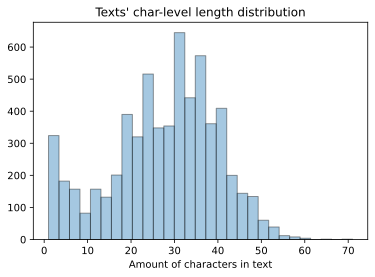

In [9]:
n_bins = int(1 + 3.222 * np.log(len(df)))
sns.distplot(df.text.str.len(), kde=False, bins=n_bins)
plt.xlabel("Amount of characters in text")
plt.title("Texts' char-level length distribution");

In [10]:
texts = df.text.to_list()

Посмотрим количество уникальных символов.

In [11]:
print("N unique symbols: %.0f" % len(functools.reduce(lambda x, y: set(x) | set(y), texts, set())))

N unique symbols: 76


Посмотрим на частотность употребления символов.

In [12]:
char_counts = Counter()
for text in texts:
    char_counts += Counter(text)

Посмотрим на примеры, где употребляются самые редкие символы.

In [13]:
threshold = 3
symbols = dict(filter(lambda x: x[1] < 10, char_counts.items())).keys()


def if_contains(string, symbols=None):
    if symbols is None:
        symbols = []
    return any(c in symbols for c in string)

df[df.text.apply(lambda x: if_contains(x, symbols=symbols))]

,filename,text
286,133_36_0.txt,mrsi
348,214_37_14.txt,до линеi остъвестъ потом iз точки b сквоз точки
376,197_13_7.txt,по указу сему ⊗
441,317_15_20.txt,невозможно ⊗
501,217_40_21.txt,черчивай паралелныя линѣi гдѣ линѣя a g
677,313_12_9.txt,о/о
736,460_3_5.txt,вителныi cенат ко
875,217_40_23.txt,есть полдиаметра h g паралелна линѣi а g
892,52_3_18.txt,годам iмѣли оную в руках но потом ⊕
1022,239_35_2.txt,чего оноя учинена] поне того) iбо


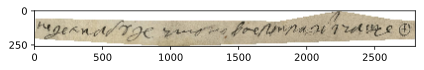

In [14]:
img = io.imread("../data/train/images/202_18_19.jpg")
io.imshow(img) 
io.show()

Выведем топ-10 самых частотных символов.

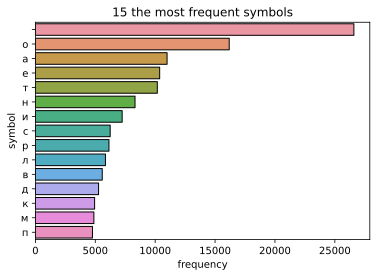

In [15]:
symbol, frequency = list(zip(*sorted(char_counts.items(), key=lambda x: x[1], reverse=True)[:15]))
dataframe = pd.DataFrame({"symbol": symbol, "frequency": frequency})
sns.barplot(y="symbol", x="frequency", data=dataframe, orient="h")
plt.title("15 the most frequent symbols");

И 10 самых редких.

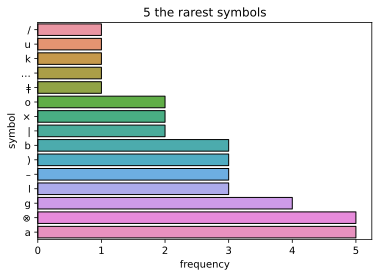

In [16]:
symbol, frequency = list(zip(*sorted(char_counts.items(), key=lambda x: x[1])[:15]))
dataframe = pd.DataFrame({"symbol": symbol, "frequency": frequency})
sns.barplot(y="symbol", x="frequency", data=dataframe, orient="h")
plt.title("5 the rarest symbols");

## Словарные статистики

In [17]:
lengths = df.text.str.split().apply(len)
print("Median amount of tokens in text: %.0f" % lengths.median())
print("Mean amount of tokens in text: %.2f" % lengths.mean())
print("Min amount of tokens in text: %.0f" % lengths.min())
print("Max amount of tokens in text: %.0f" % lengths.max())

Median amount of tokens in text: 5
Mean amount of tokens in text: 5.27
Min amount of tokens in text: 1
Max amount of tokens in text: 17


/home/rodion/Projects/ai-journey-2020/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


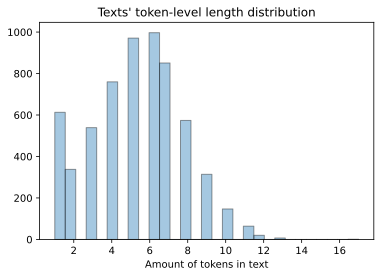

In [18]:
n_bins = int(1 + 3.222 * np.log(len(df)))
sns.distplot(lengths, kde=False, bins=n_bins)
plt.xlabel("Amount of tokens in text")
plt.title("Texts' token-level length distribution");

In [19]:
word_counts = Counter()
for text in texts:
    word_counts += Counter(text.split())

In [20]:
print("Number of unique tokens: %.0f" % len(word_counts))

Number of unique tokens: 8996


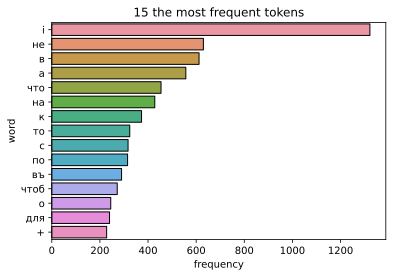

In [21]:
word, frequency = list(zip(*sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:15]))
dataframe = pd.DataFrame({"word": word, "frequency": frequency})
sns.barplot(y="word", x="frequency", data=dataframe, orient="h")
plt.title("15 the most frequent tokens");

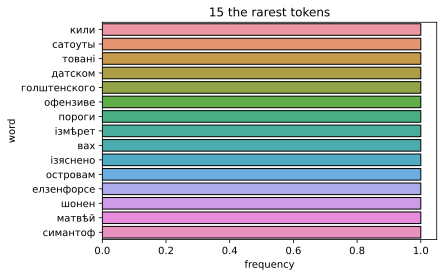

In [22]:
word, frequency = list(zip(*sorted(word_counts.items(), key=lambda x: x[1])[:15]))
dataframe = pd.DataFrame({"word": word, "frequency": frequency})
sns.barplot(y="word", x="frequency", data=dataframe, orient="h")
plt.title("15 the rarest tokens");